In [1]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/msivalenka/Mushroom-Dataset/master/mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [2]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

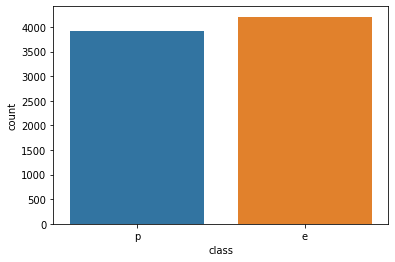

In [3]:
#Lets chcek the count of each type of mushroom graphically
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="class",data=df)
plt.show()

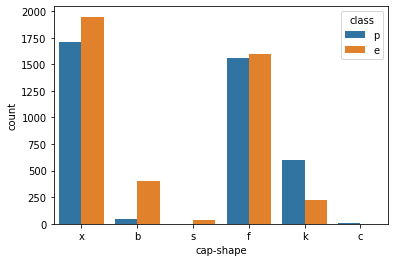

In [4]:
#Lets chcek whether the count basis of cap shape
sns.countplot(x="cap-shape",hue="class",data=df)
plt.show()
# with cap-shaped as x and f both have alsmost equal count of poisonous and not edible mushrooms
#with cap shaped as k poisonous are more

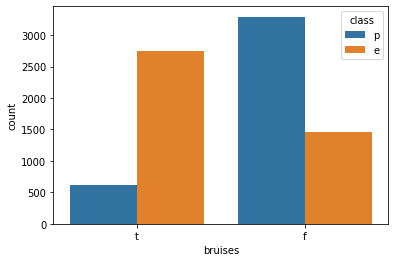

In [5]:
#lets chcek the count on the basis of bruises
sns.countplot(x="bruises",hue="class",data=df)
plt.show()
#Here we come to know that mushrooms without bruises are in very high number poisonous
#we can say almost all the mushrooms without bruises are poisonous if we leave 500 instances

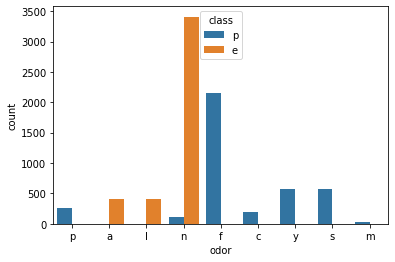

In [6]:
#lets chcek the count on the basis of "odor"
sns.countplot(x="odor",hue="class",data=df)
plt.show()
#Here we come to know that edible mushrooms are basically has odor almond ,anise and no smell
#mximum number of edible mushrooms have no smell
#maximum number of poisonous mushrooms have foul smell

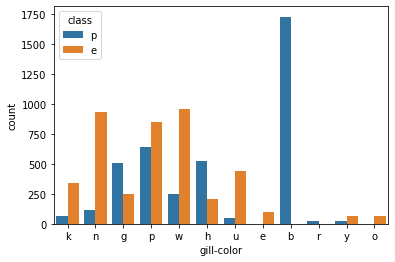

In [7]:
#Lets chcek the count on basis of gill-color
sns.countplot(x="gill-color",hue="class",data=df)
plt.show()
#from here we can conclude all mushrooms with gill color buff are poisonous and they are very high number
#So we should restrict ourselves before eating mushrooms havng gill color buff

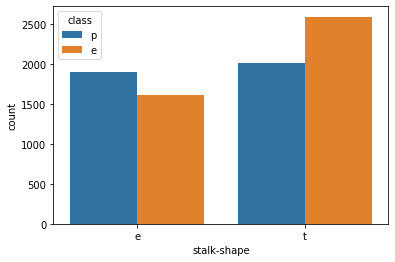

In [8]:
#Lets check the count on basis of stalk-shape
sns.countplot(x="stalk-shape",hue="class",data=df)
plt.show()

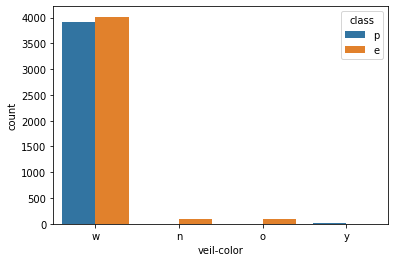

In [9]:
#lets chcek the count on basis of veil-color
sns.countplot(x="veil-color",hue="class",data=df)
plt.show()
#we cant conclude any thing from here as maximum of both types are from veil color white
#we can drop this column also as it has very less variance

In [10]:
#lets drop the column veil-color as concluded from above
df.drop(columns=["veil-color"],inplace=True)

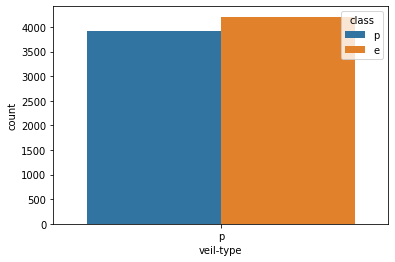

In [11]:
#lets chcek the count on basis of veil-type
sns.countplot(x="veil-type",hue="class",data=df)
plt.show()
#so we can say veil type aslo does not prvide any clear distinction on its own

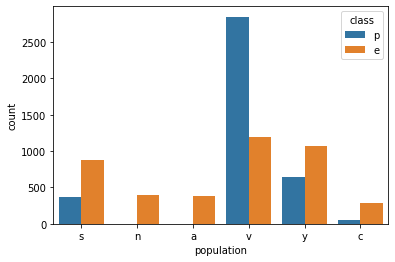

In [12]:
#lets chcek the counts on the basis of population
sns.countplot(x="population",hue="class",data=df)
plt.show()

In [13]:
#Let's now divide the dataset into input and output
df_x=df.drop(columns=["class"])
y=df[["class"]]

In [14]:
#we will convert the input into into integers using get_dummies
df_x=pd.get_dummies(df_x,drop_first=True)

In [15]:
#lets chcek the shape
df_x.shape

(8124, 92)

In [16]:
#Lets bring input dataset features to same scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [17]:
#lets use labelencoder to convert target class into integers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 0, ..., 0, 1, 0])

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=55)
principalComponents = pca.fit_transform(x)
#principalDf = pd.DataFrame(data = principalComponents
#             , columns = ['principal component 1', 'principal component 2'])

In [19]:
#Lets chcek information retained after dimensionality reduction
sum(pca.explained_variance_ratio_)
#therefore we reduced the dimensions from 92 to 55

0.9588302167858739

In [20]:
#We will use f1 score as the metrics as it is balanced dataset problem
#Maximum f1 score in between random states 42 to 100
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
def maxf1_score(clf,df_x,y):
    maxf=0
    rs=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        tmp=f1_score(y_test,y_pred)
        print("random state :",r_state," and f1 score: ",tmp)
        if tmp>maxf:
            maxf=tmp
            rs=r_state
    print("maximum f1_score is at random state :",rs," and it is :",maxf)

In [21]:
#lets use logistic regression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
lg_clf=LogisticRegression()
maxf1_score(lg_clf,principalComponents,y)

random state : 42  and f1 score:  0.9987212276214833
random state : 43  and f1 score:  0.9993610223642173
random state : 44  and f1 score:  0.9980806142034548
random state : 45  and f1 score:  1.0
random state : 46  and f1 score:  1.0
random state : 47  and f1 score:  1.0
random state : 48  and f1 score:  0.9993610223642173
random state : 49  and f1 score:  1.0
random state : 50  and f1 score:  0.9993610223642173
random state : 51  and f1 score:  1.0
random state : 52  and f1 score:  1.0
random state : 53  and f1 score:  1.0
random state : 54  and f1 score:  0.9987212276214833
random state : 55  and f1 score:  0.9993610223642173
random state : 56  and f1 score:  1.0
random state : 57  and f1 score:  0.9993610223642173
random state : 58  and f1 score:  1.0
random state : 59  and f1 score:  0.9993610223642173
random state : 60  and f1 score:  0.9993610223642173
random state : 61  and f1 score:  0.9993610223642173
random state : 62  and f1 score:  0.9993610223642173
random state : 63  and

In [22]:
#Lets use cross_val_score and evaluate the logistic regression model
from sklearn.model_selection import cross_val_score
print("Mean f1 score for logistic classifier: ",cross_val_score(lg_clf,principalComponents,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for logistic classifier: ",cross_val_score(lg_clf,principalComponents,y,cv=5,scoring="f1").std())
print(cross_val_score(lg_clf,principalComponents,y,cv=5,scoring="f1"))

Mean f1 score for logistic classifier:  0.9271308162987
standard deviation in f1 score for logistic classifier:  0.10710263573469608
[0.9142462  0.99936102 0.99872123 1.         0.72332564]


In [23]:
#Lets use KNN
#For KNN we need to know the best value of k using grid search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="f1")
clf.fit(principalComponents,y)
clf.best_params_

{'n_neighbors': 2}

In [24]:
kc=KNeighborsClassifier(n_neighbors=2)
maxf1_score(kc,principalComponents,y)

random state : 42  and f1 score:  0.9987212276214833
random state : 43  and f1 score:  1.0
random state : 44  and f1 score:  0.9987212276214833
random state : 45  and f1 score:  1.0
random state : 46  and f1 score:  1.0
random state : 47  and f1 score:  1.0
random state : 48  and f1 score:  1.0
random state : 49  and f1 score:  1.0
random state : 50  and f1 score:  1.0
random state : 51  and f1 score:  1.0
random state : 52  and f1 score:  1.0
random state : 53  and f1 score:  1.0
random state : 54  and f1 score:  0.9987212276214833
random state : 55  and f1 score:  1.0
random state : 56  and f1 score:  1.0
random state : 57  and f1 score:  1.0
random state : 58  and f1 score:  1.0
random state : 59  and f1 score:  1.0
random state : 60  and f1 score:  1.0
random state : 61  and f1 score:  1.0
random state : 62  and f1 score:  1.0
random state : 63  and f1 score:  1.0
random state : 64  and f1 score:  1.0
random state : 65  and f1 score:  1.0
random state : 66  and f1 score:  1.0
rando

In [25]:
#Lets use cross_val_score and evaluate the knn model
from sklearn.model_selection import cross_val_score
print("Mean f1 score for knn classifier: ",cross_val_score(kc,principalComponents,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for knn classifier: ",cross_val_score(kc,principalComponents,y,cv=5,scoring="f1").std())
print(cross_val_score(kc,principalComponents,y,cv=5,scoring="f1"))

Mean f1 score for knn classifier:  0.9301731179382889
standard deviation in f1 score for knn classifier:  0.08488152199331807
[0.81031866 1.         0.99679693 1.         0.84375   ]


In [26]:
#lets use decision tree
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
maxf1_score(dc,principalComponents,y)

random state : 42  and f1 score:  0.9974489795918366
random state : 43  and f1 score:  0.9948849104859335
random state : 44  and f1 score:  0.9942492012779554
random state : 45  and f1 score:  0.9929802169751116
random state : 46  and f1 score:  0.9942638623326959
random state : 47  and f1 score:  0.9955499046408137
random state : 48  and f1 score:  0.998085513720485
random state : 49  and f1 score:  0.9987244897959183
random state : 50  and f1 score:  0.9980830670926518
random state : 51  and f1 score:  0.9987212276214833
random state : 52  and f1 score:  0.9961685823754789
random state : 53  and f1 score:  0.9974489795918366
random state : 54  and f1 score:  0.9955271565495207
random state : 55  and f1 score:  0.9961587708066583
random state : 56  and f1 score:  0.9968051118210861
random state : 57  and f1 score:  0.9968132568514977
random state : 58  and f1 score:  0.9974489795918366
random state : 59  and f1 score:  0.9961685823754789
random state : 60  and f1 score:  0.99744897959

In [27]:
#Lets use cross_val_score and evaluate the knn model
from sklearn.model_selection import cross_val_score
print("Mean f1 score for decision tree classifier: ",cross_val_score(dc,principalComponents,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for decision tree classifier: ",cross_val_score(dc,principalComponents,y,cv=5,scoring="f1").std())
print(cross_val_score(dc,principalComponents,y,cv=5,scoring="f1"))

Mean f1 score for decision tree classifier:  0.9053155798372933
standard deviation in f1 score for decision tree classifier:  0.0965558381606422
[0.81122062 0.99618321 0.95472703 0.99617834 0.76176176]


In [28]:
#lets use ensemble calssifier such as random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5,scoring="f1")
clf.fit(principalComponents,y)
clf.best_params_

{'n_estimators': 500}

In [30]:
rf_clf=RandomForestClassifier(n_estimators=500)
maxf1_score(rf_clf,principalComponents,y)

random state : 42  and f1 score:  0.9987212276214833
random state : 43  and f1 score:  1.0
random state : 44  and f1 score:  0.9993610223642173
random state : 45  and f1 score:  1.0
random state : 46  and f1 score:  1.0
random state : 47  and f1 score:  1.0
random state : 48  and f1 score:  1.0
random state : 49  and f1 score:  1.0
random state : 50  and f1 score:  1.0
random state : 51  and f1 score:  1.0
random state : 52  and f1 score:  1.0
random state : 53  and f1 score:  1.0
random state : 54  and f1 score:  0.9993610223642173
random state : 55  and f1 score:  1.0
random state : 56  and f1 score:  1.0
random state : 57  and f1 score:  1.0
random state : 58  and f1 score:  1.0
random state : 59  and f1 score:  0.9993610223642173
random state : 60  and f1 score:  1.0
random state : 61  and f1 score:  1.0
random state : 62  and f1 score:  1.0
random state : 63  and f1 score:  1.0
random state : 64  and f1 score:  1.0
random state : 65  and f1 score:  1.0
random state : 66  and f1 sc

In [31]:
#lets again use cross val score
print("Mean f1 score for random forest classifier: ",cross_val_score(rf_clf,principalComponents,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for random forest classifier: ",cross_val_score(rf_clf,principalComponents,y,cv=5,scoring="f1").std())
print(cross_val_score(rf_clf,principalComponents,y,cv=5,scoring="f1"))

Mean f1 score for random forest classifier:  0.9062716412363472
standard deviation in f1 score for random forest classifier:  0.11158985735437021
[0.79938744 1.         0.99292605 1.         0.75216138]


In [32]:
# Lets check naive bayes
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
maxf1_score(gnb,principalComponents,y)

random state : 42  and f1 score:  0.8093750000000001
random state : 43  and f1 score:  0.8062015503875969
random state : 44  and f1 score:  0.8135770234986945
random state : 45  and f1 score:  0.8064182194616978
random state : 46  and f1 score:  0.8068006182380216
random state : 47  and f1 score:  0.7892875189489642
random state : 48  and f1 score:  0.7942973523421589
random state : 49  and f1 score:  0.799182422074604
random state : 50  and f1 score:  0.8051546391752578
random state : 51  and f1 score:  0.8116242864556305
random state : 52  and f1 score:  0.7967229902713774
random state : 53  and f1 score:  0.8143899895724713
random state : 54  and f1 score:  0.7890466531440163
random state : 55  and f1 score:  0.8084886128364388
random state : 56  and f1 score:  0.8141592920353982
random state : 57  and f1 score:  0.8028895768833849
random state : 58  and f1 score:  0.8037190082644629
random state : 59  and f1 score:  0.7989769820971866
random state : 60  and f1 score:  0.79856483854

In [33]:
#lets again use cross val score
print("Mean f1 score for GaussianNB: ",cross_val_score(rf_clf,principalComponents,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for GaussianNB: ",cross_val_score(rf_clf,principalComponents,y,cv=5,scoring="f1").std())
print(cross_val_score(rf_clf,principalComponents,y,cv=5,scoring="f1"))

Mean f1 score for GaussianNB:  0.9048118444629653
standard deviation in f1 score for GaussianNB:  0.10959832043143035
[0.79938744 1.         0.99550994 1.         0.73902784]


In [34]:
#Lets use SVM
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="f1")
clf.fit(principalComponents,y)
clf.best_params_

{'C': 1, 'kernel': 'poly'}

In [35]:
svc=SVC(kernel="poly",C=1)
maxf1_score(svc,principalComponents,y)

random state : 42  and f1 score:  0.9987212276214833
random state : 43  and f1 score:  0.9993610223642173
random state : 44  and f1 score:  0.9980806142034548
random state : 45  and f1 score:  1.0
random state : 46  and f1 score:  1.0
random state : 47  and f1 score:  1.0
random state : 48  and f1 score:  0.9993610223642173
random state : 49  and f1 score:  1.0
random state : 50  and f1 score:  0.9993610223642173
random state : 51  and f1 score:  1.0
random state : 52  and f1 score:  1.0
random state : 53  and f1 score:  1.0
random state : 54  and f1 score:  0.9987212276214833
random state : 55  and f1 score:  0.9993610223642173
random state : 56  and f1 score:  1.0
random state : 57  and f1 score:  0.9993610223642173
random state : 58  and f1 score:  0.9993610223642173
random state : 59  and f1 score:  0.9993610223642173
random state : 60  and f1 score:  0.9993610223642173
random state : 61  and f1 score:  0.9993610223642173
random state : 62  and f1 score:  0.9987212276214833
random 

In [36]:
#lets again use cross val score
print("Mean f1 score for SVM classifier: ",cross_val_score(svc,principalComponents,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for SVM classifier: ",cross_val_score(svc,principalComponents,y,cv=5,scoring="f1").std())
print(cross_val_score(svc,principalComponents,y,cv=5,scoring="f1"))

Mean f1 score for SVM classifier:  0.9398464138260996
standard deviation in f1 score for SVM classifier:  0.07759449877279885
[0.80487805 0.99936102 0.99550994 1.         0.89948306]


In [37]:
#comparitively SVM is performing better so lets use svm
#random state 45
svc=SVC(kernel="poly",C=1)
x_train,x_test,y_train,y_test=train_test_split(principalComponents, y,random_state = 45,test_size=0.20,stratify=y)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[842   0]
 [  0 783]]
f1 score is :  1.0
classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

AUC ROC Score:  1.0
